In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
from IPython.display import Image as IPImage
from PIL import Image, ImageDraw, ImageTk
import os
import glob
import math
import tkinter as tk

# universal constants

In [2]:
g = 9.8  # acceleration due to gravity (m/s^2)

# projectile motion

Enter initial velocity (m/s): 6
Enter launch angle (degrees): 36

Time of Flight: 0.72 seconds
Maximum Height: 0.63 m
Maximum Range: 3.49 m


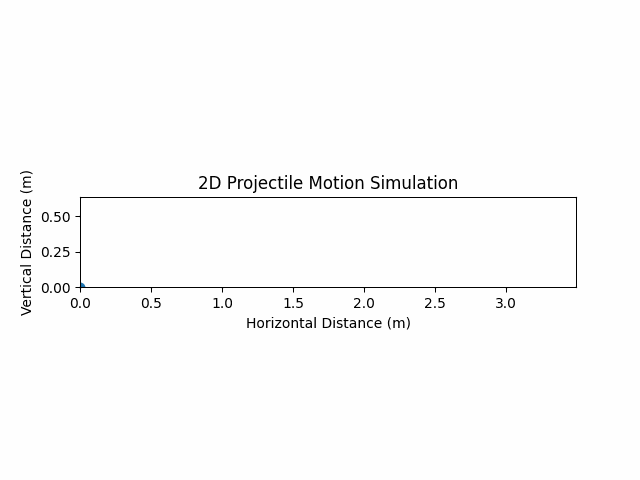

In [3]:
def projectile_motion(initial_velocity, launch_angle):
    
    horizontal_velocity = initial_velocity * np.cos(np.radians(launch_angle))
    vertical_velocity = initial_velocity * np.sin(np.radians(launch_angle))

    time_of_flight = (2 * vertical_velocity) / g
    max_height = (vertical_velocity ** 2) / (2 * g)
    max_range = horizontal_velocity * time_of_flight

    return time_of_flight, max_height, max_range

def create_gif(initial_velocity, launch_angle, filename='2d_projectile_motion.gif'):
    fig, ax = plt.subplots()

    time_of_flight, max_height, max_range = projectile_motion(initial_velocity, launch_angle)

    ax.set_xlim(0, max_range)
    ax.set_ylim(0, max_height)

    ax.set_xlabel('Horizontal Distance (m)')
    ax.set_ylabel('Vertical Distance (m)')
    ax.set_title('2D Projectile Motion Simulation')
    ax.set_aspect('equal')

    line, = ax.plot([], [], 'o-')

    num_frames = 100  # Adjust this number as needed

    def update(frame):
        g = 9.8  # acceleration due to gravity (m/s^2)

        horizontal_velocity = initial_velocity * np.cos(np.radians(launch_angle))
        vertical_velocity = initial_velocity * np.sin(np.radians(launch_angle))

        x = horizontal_velocity * frame * time_of_flight / num_frames
        y = vertical_velocity * frame * time_of_flight / num_frames - 0.5 * g * (frame * time_of_flight / num_frames)**2

        line.set_data([x], [y])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True)

    # Save each frame as a PNG file
    frames_path = 'frames/'
    os.makedirs(frames_path, exist_ok=True)
    for i, frame in enumerate(range(num_frames)):
        update(frame)
        fig.savefig(os.path.join(frames_path, f'frame_{i:03d}.png'))

    # Convert PNG frames to GIF using Pillow
    frames = [Image.open(os.path.join(frames_path, f'frame_{i:03d}.png')) for i in range(num_frames)]
    frames[0].save(filename, save_all=True, append_images=frames[1:],
                   duration=time_of_flight / num_frames * 1000, loop=0)

    # Remove the temporary frames
    for frame_path in glob.glob(os.path.join(frames_path, '*.png')):
        os.remove(frame_path)
    os.rmdir(frames_path)

    plt.close(fig)

def display_gif(filename='2d_projectile_motion.gif'):
    with open(filename, 'rb') as f:
        display(IPImage(data=f.read(), format='gif'))

def main():
    initial_velocity = float(input("Enter initial velocity (m/s): "))
    launch_angle = float(input("Enter launch angle (degrees): "))

    time_of_flight, max_height, max_range = projectile_motion(
        initial_velocity, launch_angle
    )

    print(f"\nTime of Flight: {time_of_flight:.2f} seconds")
    print(f"Maximum Height: {max_height:.2f} m")
    print(f"Maximum Range: {max_range:.2f} m")

    create_gif(initial_velocity, launch_angle)
    display_gif()

if __name__ == "__main__":
    main()

Enter initial velocity (m/s): 9
Enter horizontal launch angle (degrees): 81
Enter vertical launch angle (degrees): 18

Time of Flight: 0.56 seconds
Maximum Height: 0.38 meters
Maximum Range: 0.79 meters


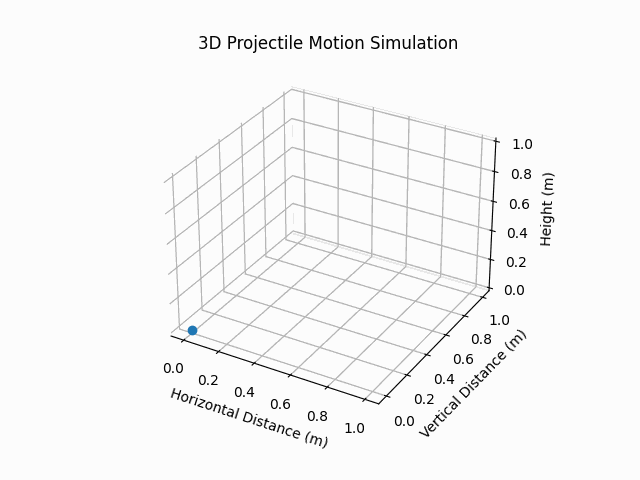

In [4]:
def projectile_motion(initial_velocity, launch_angle_horizontal, launch_angle_vertical):
    g = 9.8  # acceleration due to gravity (m/s^2)

    horizontal_velocity = initial_velocity * np.cos(np.radians(launch_angle_horizontal))
    vertical_velocity = initial_velocity * np.sin(np.radians(launch_angle_horizontal)) * np.sin(np.radians(launch_angle_vertical))

    time_of_flight = (2 * vertical_velocity) / g
    max_height = (vertical_velocity ** 2) / (2 * g)
    max_range = horizontal_velocity * time_of_flight

    return time_of_flight, max_height, max_range

def create_3d_trajectory(initial_velocity, launch_angle_horizontal, launch_angle_vertical, filename='3d_projectile_motion.gif'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    time_of_flight, max_height, max_range = projectile_motion(initial_velocity, launch_angle_horizontal, launch_angle_vertical)

    ax.set_xlabel('Horizontal Distance (m)')
    ax.set_ylabel('Vertical Distance (m)')
    ax.set_zlabel('Height (m)')
    ax.set_title('3D Projectile Motion Simulation')

    line, = ax.plot([], [], [], 'o-', label='Projectile Path')

    num_frames = 100  # Adjust this number as needed

    def update(frame):
        g = 9.8  # acceleration due to gravity (m/s^2)

        horizontal_velocity = initial_velocity * np.cos(np.radians(launch_angle_horizontal))
        vertical_velocity = initial_velocity * np.sin(np.radians(launch_angle_horizontal)) * np.sin(np.radians(launch_angle_vertical))

        x = horizontal_velocity * frame * time_of_flight / num_frames
        y = vertical_velocity * frame * time_of_flight / num_frames - 0.5 * g * (frame * time_of_flight / num_frames)**2
        z = y  # Assuming the same trajectory in the z-direction (height)

        line.set_data([x], [y])
        line.set_3d_properties([z])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True)

    # Save each frame as a PNG file
    frames_path = 'frames_3d/'
    os.makedirs(frames_path, exist_ok=True)
    for i, frame in enumerate(range(num_frames)):
        update(frame)
        fig.savefig(os.path.join(frames_path, f'frame_{i:03d}.png'))

    # Convert PNG frames to GIF using Pillow
    frames = [Image.open(os.path.join(frames_path, f'frame_{i:03d}.png')) for i in range(num_frames)]
    frames[0].save(filename, save_all=True, append_images=frames[1:],
                   duration=time_of_flight / num_frames * 1000, loop=0)

    # Remove the temporary frames
    for frame_path in glob.glob(os.path.join(frames_path, '*.png')):
        os.remove(frame_path)
    os.rmdir(frames_path)

    plt.close(fig)

def display_3d_trajectory(filename='3d_projectile_motion.gif'):
    with open(filename, 'rb') as f:
        display(IPImage(data=f.read(), format='png'))

def main():
    initial_velocity = float(input("Enter initial velocity (m/s): "))
    launch_angle_horizontal = float(input("Enter horizontal launch angle (degrees): "))
    launch_angle_vertical = float(input("Enter vertical launch angle (degrees): "))

    time_of_flight, max_height, max_range = projectile_motion(
        initial_velocity, launch_angle_horizontal, launch_angle_vertical
    )

    print(f"\nTime of Flight: {time_of_flight:.2f} seconds")
    print(f"Maximum Height: {max_height:.2f} meters")
    print(f"Maximum Range: {max_range:.2f} meters")

    create_3d_trajectory(initial_velocity, launch_angle_horizontal, launch_angle_vertical)
    display_3d_trajectory()

if __name__ == "__main__":
    main()

# optics (lens)

Plot saved as convex_lens_demo.png


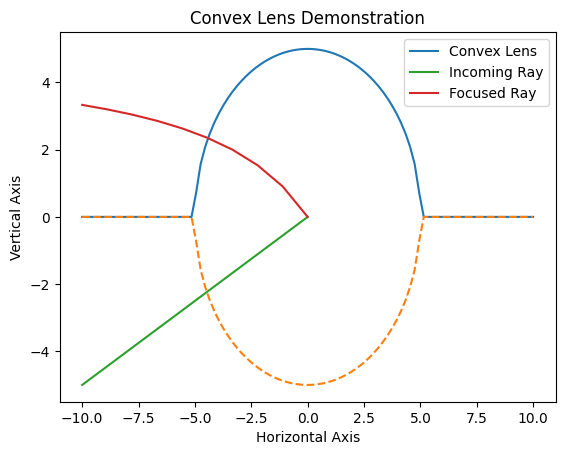

In [5]:
class ConvexLens:
    def __init__(self, focal_length):
        self.focal_length = focal_length

    def focus_ray(self, x):
        return (self.focal_length * x) / (x - self.focal_length)

def plot_convex_lens(convex_lens, save_path=None):
    x = np.linspace(-10, 10, 100)
    y_lens = np.sqrt(np.maximum(0, convex_lens.focal_length**2 - x**2))

    plt.plot(x, y_lens, label='Convex Lens')
    plt.plot(x, -y_lens, linestyle='--')

    # Plot a parallel ray
    x_ray = np.linspace(-10, 0, 10)
    y_ray = x_ray / 2  # Simple approximation
    plt.plot(x_ray, y_ray, label='Incoming Ray')

    # Focus the ray using the lens
    y_focused_ray = convex_lens.focus_ray(x_ray)
    plt.plot(x_ray, y_focused_ray, label='Focused Ray')

    plt.xlabel('Horizontal Axis')
    plt.ylabel('Vertical Axis')
    plt.legend()
    plt.title('Convex Lens Demonstration')

    if save_path:
        plt.savefig(save_path)
        print(f"Plot saved as {save_path}")
    else:
        plt.show()

if __name__ == "__main__":
    focal_length = 5
    convex_lens = ConvexLens(focal_length)
    save_path = "convex_lens_demo.png"
    plot_convex_lens(convex_lens, save_path)


# solar system

/var/folders/n4/yygqk1bx3bj26nqnx472qfn80000gn/T/ipykernel_24510/857639241.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  bodies_plot[body.name].set_data(pos[0], pos[1])
/var/folders/n4/yygqk1bx3bj26nqnx472qfn80000gn/T/ipykernel_24510/857639241.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  bodies_plot[body.name].set_data(pos[0], pos[1])


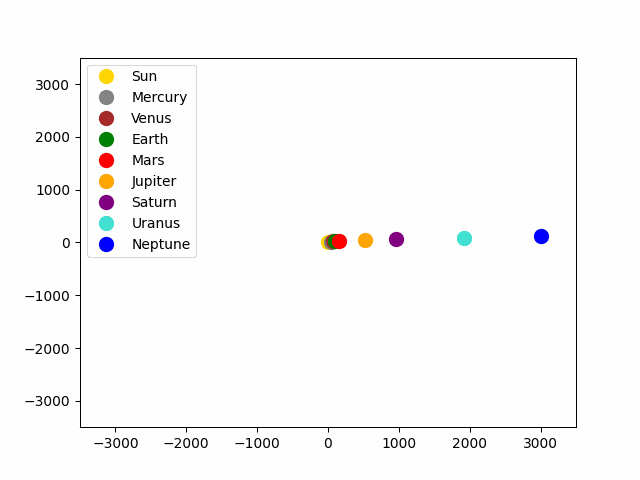

In [6]:
class CelestialBody:
    def __init__(self, name, mass, radius, distance, velocity, color):
        self.name = name
        self.mass = mass
        self.radius = radius
        self.distance = distance
        self.velocity = velocity
        self.color = color
        self.angle = 0

    def update_position(self):
        x = self.distance * math.cos(math.radians(self.angle))
        y = self.distance * math.sin(math.radians(self.angle))
        return x, y

    def move(self, time_step):
        self.angle += self.velocity * time_step

class SolarSystem:
    def __init__(self):
        self.bodies = []

    def add_body(self, body):
        self.bodies.append(body)

    def move_bodies(self, time_step):
        for body in self.bodies:
            body.move(time_step)

def update(frame, solar_system, bodies_plot):
    solar_system.move_bodies(0.1)
    positions = [body.update_position() for body in solar_system.bodies]

    # Update the position and color of each celestial body in the plot
    for body, pos in zip(solar_system.bodies, positions):
        bodies_plot[body.name].set_data(pos[0], pos[1])
        bodies_plot[body.name].set_color(body.color)

    return list(bodies_plot.values())


def display_gif(filename='solar_system_simulation.gif'):
    with open(filename, 'rb') as f:
        display(IPImage(data=f.read(), format='gif'))

def main():
    # Create solar system
    solar_system = SolarSystem()

    # Create celestial bodies
    #body name, mass (kg), radius (km), distance from sun (au*100), relative velocity (km/s), color
    sun = CelestialBody("Sun", 1.989e30, 6.957e6, 0, 0, 'gold')
    mercury = CelestialBody("Mercury", 3.285e23, 2.440e3, 39, 47.87, 'gray')
    venus = CelestialBody("Venus", 4.867e24, 6.051e3, 72, 35.02, 'brown')
    earth = CelestialBody("Earth", 5.972e24, 6.371e3, 100, 29.78, 'green')
    mars = CelestialBody("Mars", 6.4171e23, 3.390e3, 152, 24.08, 'red')
    jupiter = CelestialBody("Jupiter", 1.898e27, 6.991e5, 520, 13.06, 'orange')
    saturn = CelestialBody("Saturn", 5.683e26, 5.823e5, 958, 9.68, 'purple')
    uranus = CelestialBody("Uranus", 8.681e25, 2.536e5, 1922, 6.80, 'turquoise')
    neptune = CelestialBody("Neptune", 1.024e26, 2.462e5, 3005, 5.43, 'blue')
    bodies = [sun, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune]

    legend_handles = []
    legend_labels = []
    
    # Create a plot
    fig, ax = plt.subplots()
    ax.set_xlim(-3500, 3500)
    ax.set_ylim(-3500, 3500)
    # ax.set_aspect('equal', adjustable='box')
    
    # Add bodies to the solar system
    for body in bodies:
        solar_system.add_body(body)
        legend_handles.append(ax.plot([], [], 'o', markersize=10, color=body.color)[0])
        legend_labels.append(body.name)

    # Plot celestial bodies
    bodies_plot = {body.name: ax.plot([], [], 'o', markersize=10)[0] for body in solar_system.bodies}

    # Legend
    ax.legend(legend_handles, legend_labels, loc='upper left')
    
    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=range(1000), fargs=(solar_system, bodies_plot),
                              blit=True, interval=50)

    # Save the animation as a GIF
    ani.save('solar_system_simulation.gif', writer='pillow')
    plt.close(fig)
    display_gif()

if __name__ == "__main__":
    main()

# fractals

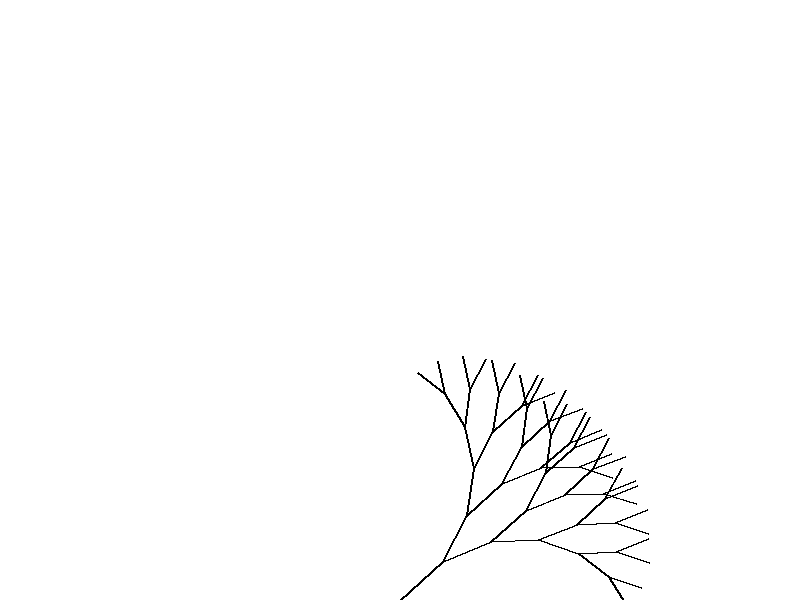

In [7]:
class FractalTreeGenerator:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Fractal Tree Generator")
        self.image = None

        # Default parameters
        self.trunk_length = tk.DoubleVar(value=100)
        self.trunk_angle = tk.DoubleVar(value=90)
        self.branch_ratio = tk.DoubleVar(value=0.7)
        self.max_depth = tk.IntVar(value=6)

        # Create GUI elements
        self.create_widgets()

    def create_widgets(self):
        # Create a scrollable canvas
        canvas_frame = tk.Frame(self.root)
        canvas_frame.pack(fill=tk.BOTH, expand=tk.YES)

        self.canvas = tk.Canvas(canvas_frame, scrollregion=(0, 0, 800, 600), width=800, height=600, bg="white")
        self.canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=tk.YES)

        # Add a scrollbar to the canvas
        scrollbar = tk.Scrollbar(canvas_frame, command=self.canvas.yview)
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        self.canvas.config(yscrollcommand=scrollbar.set)

        # Label and sliders for parameters
        tk.Label(self.canvas, text="Trunk Length").pack()
        tk.Scale(self.canvas, from_=10, to=200, variable=self.trunk_length, orient="horizontal").pack()

        tk.Label(self.canvas, text="Trunk Angle").pack()
        tk.Scale(self.canvas, from_=0, to=180, variable=self.trunk_angle, orient="horizontal").pack()

        tk.Label(self.canvas, text="Branch Ratio").pack()
        tk.Scale(self.canvas, from_=0.1, to=1.0, resolution=0.1, variable=self.branch_ratio, orient="horizontal").pack()

        tk.Label(self.canvas, text="Max Depth").pack()
        tk.Scale(self.canvas, from_=1, to=10, variable=self.max_depth, orient="horizontal").pack()

        # Button to generate and display the fractal tree
        tk.Button(self.canvas, text="Generate Fractal Tree", command=self.draw_fractal_tree).pack()

        # Button to save the generated image
        tk.Button(self.canvas, text="Save Image", command=self.save_image).pack()

        # Start the Tkinter event loop
        self.root.mainloop()

    def draw_fractal_tree(self):
        # Clear previous drawing
        self.canvas.delete("all")

        # Initialize a new ImageDraw object
        image = Image.new("RGB", (800, 600), "white")
        draw = ImageDraw.Draw(image)

        # Draw the fractal tree
        self._draw_branch(400, 600, self.trunk_length.get(), self.trunk_angle.get(), 0, draw)

        # Save the original Image object
        self.image = image

        # Convert the PIL Image to a Tkinter-compatible PhotoImage
        self.photo_image = ImageTk.PhotoImage(image)

        # Display the image on the canvas
        self.canvas.create_image(0, 0, anchor=tk.NW, image=self.photo_image)
        self.canvas.config(scrollregion=self.canvas.bbox(tk.ALL))  # Update scroll region

    def _draw_branch(self, x, y, length, angle, depth, draw):
        if depth == self.max_depth.get():
            return

        x_end = x + length * math.sin(math.radians(angle))
        y_end = y - length * math.cos(math.radians(angle))

        draw.line([(x, y), (x_end, y_end)], fill="black", width=2)

        new_length = length * self.branch_ratio.get()

        self._draw_branch(x_end, y_end, new_length, angle - 20, depth + 1, draw)
        self._draw_branch(x_end, y_end, new_length, angle + 20, depth + 1, draw)

    def save_image(self):
        # Check if the image has been generated
        if self.image:
            # Save the generated image
            filename = "fractal_tree.png"
            self.image.save(filename)

            # Open the saved image using PIL
            saved_image = Image.open(filename)

            # Convert the PIL Image to a Tkinter-compatible PhotoImage
            saved_photo_image = ImageTk.PhotoImage(saved_image)

            # Display the saved image on the canvas
            self.canvas.create_image(0, 0, anchor=tk.NW, image=saved_photo_image)
            self.canvas.config(scrollregion=self.canvas.bbox(tk.ALL))  # Update scroll region
        else:
            print("Please generate the fractal tree first.")

def display_file(filename='fractal_tree.png'):
    with open(filename, 'rb') as f:
        display(IPImage(data=f.read(), format='png'))

if __name__ == "__main__":
    FractalTreeGenerator()
    display_file()